In [1]:
# PROJECT NAME - Yes Bank Stock Price Prediction Using Ensemble Models

In [2]:
# PROJECT SUMMARY - This project aims to develop a predictive machine learning model to forecast the monthly closing prices of Yes Bank shares using historical stock market data. The pipeline includes comprehensive exploratory data analysis (EDA) under the UBM rule (Univariate, Bivariate, Multivariate), hypothesis testing, feature engineering, implementation of ensemble regression models (Gradient Boosting, Random Forest, XGBoost) to provide accurate price forecasts.

In [3]:
# PROBLEM STATEMENT - The share prices of Yes Bank have shown significant volatility over time. Accurate forecasting of closing prices can help investors make better financial decisions. The problem is to predict the monthly closing price of Yes Bank stock based on historical data using advanced machine learning techniques.

In [5]:
# IMPORT LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

In [6]:
# DATASET LOADING

from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Yes Bank Stock Price.csv')

Saving Yes Bank Stock Price.csv to Yes Bank Stock Price.csv


In [7]:
# FIRST VIEW OF DATASET

df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [8]:
# ROWS & COLUMNS

df.shape

(185, 5)

In [9]:
# DUPLICATE VALUES

df.duplicated().sum()

np.int64(0)

In [10]:
# MISSING/NULL VALUES

df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


In [11]:
# VARIABLES DESCRIPTION

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [12]:
# UNIQUE VALUE CHECK

df.nunique()

,0
Date,185
Open,183
High,184
Low,183
Close,185


In [13]:
# DATA WRANGLING

df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df = df.sort_values('Date').reset_index(drop=True)

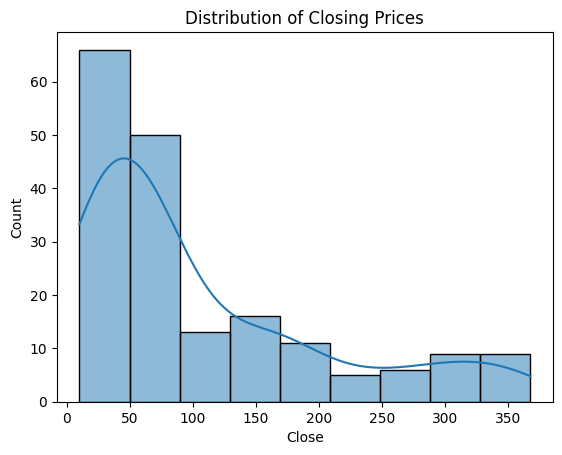

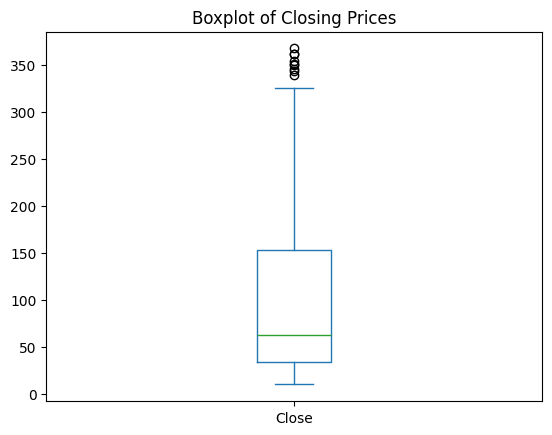

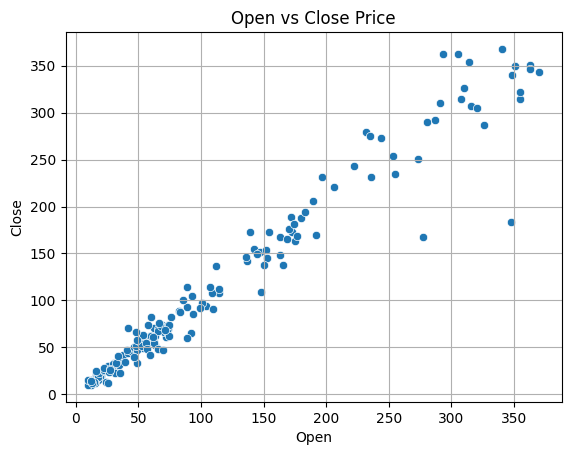

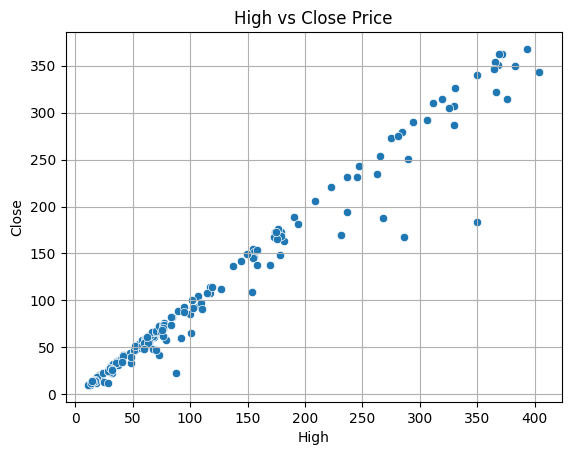

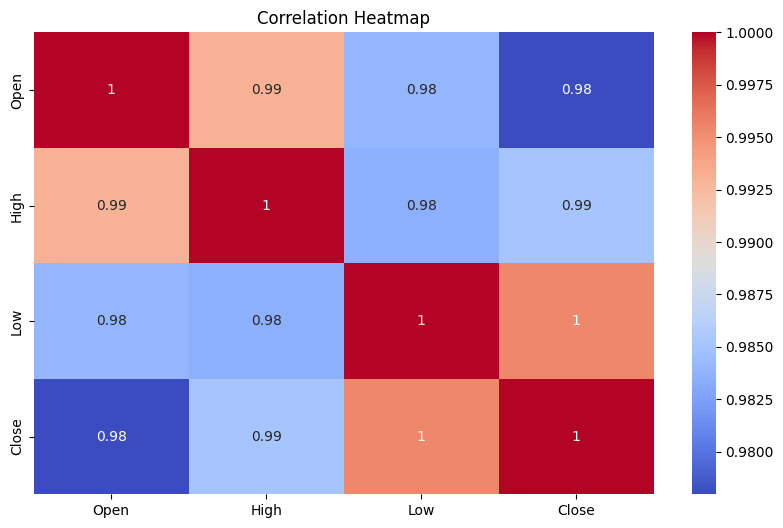

In [14]:
# EXPLORATORY DATA ANALYSIS (UBM RULE)

# Univariate Analysis
sns.histplot(df['Close'], kde=True)
plt.title('Distribution of Closing Prices')
plt.show()
df['Close'].plot(kind='box')
plt.title('Boxplot of Closing Prices')
plt.show()

# Bivariate Analysis
sns.scatterplot(x='Open', y='Close', data=df)
plt.title('Open vs Close Price')
plt.grid(True)
plt.show()
sns.scatterplot(x='High', y='Close', data=df)
plt.title('High vs Close Price')
plt.grid(True)
plt.show()

# Multivariate Analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

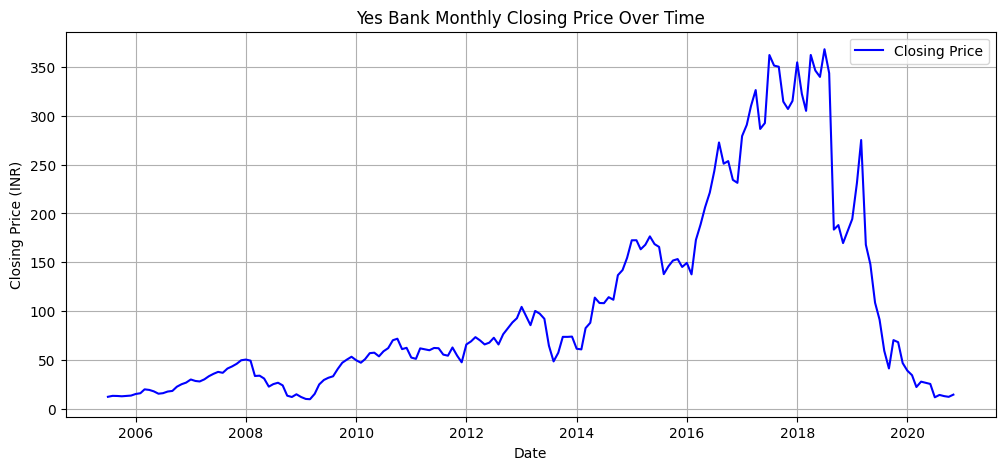

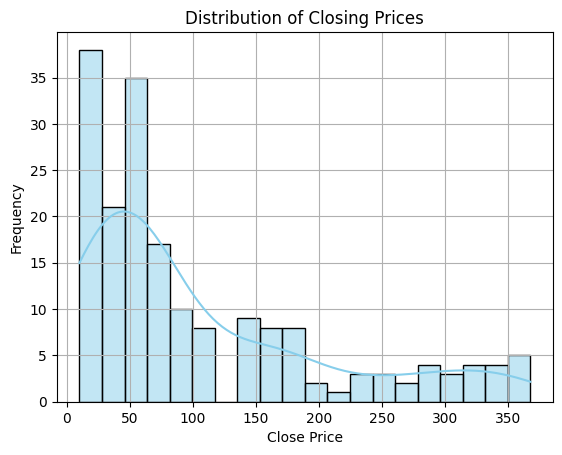

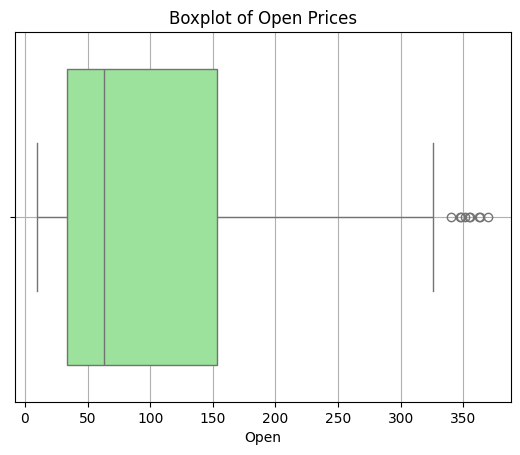

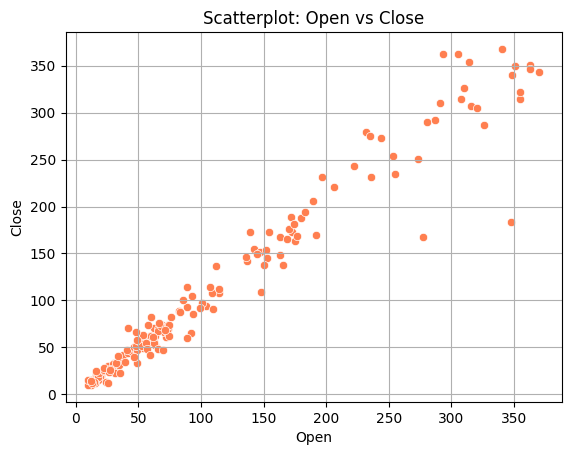

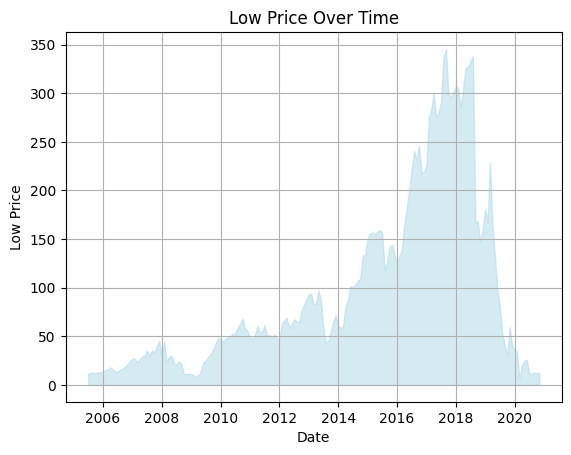

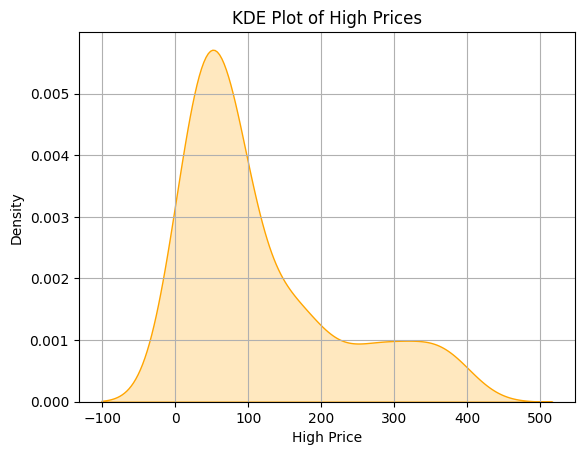

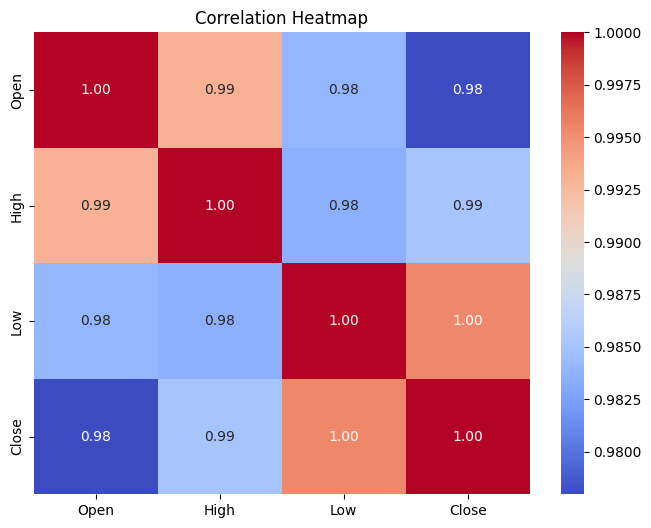

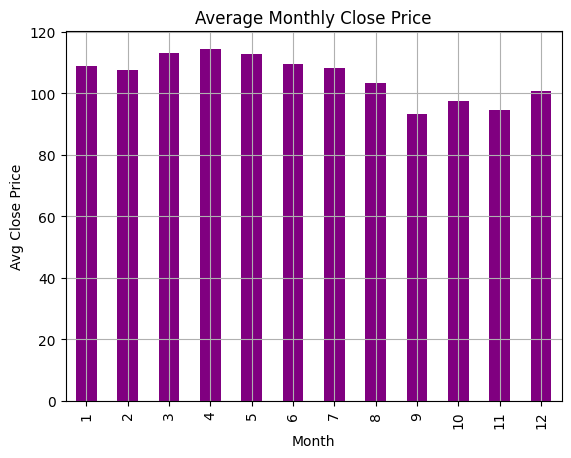

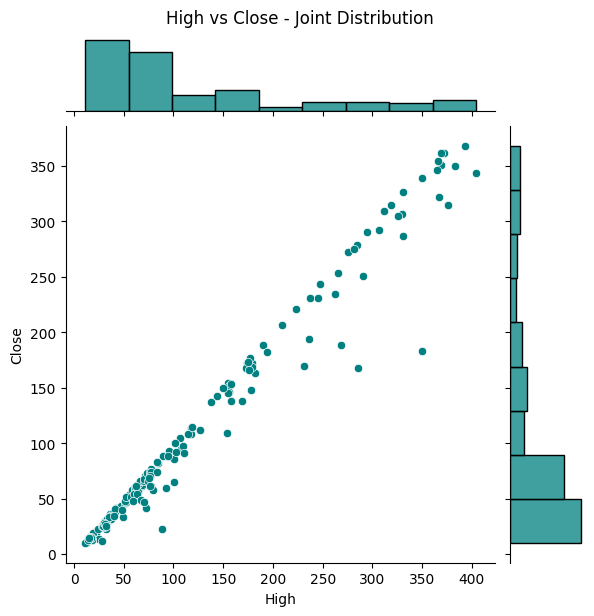

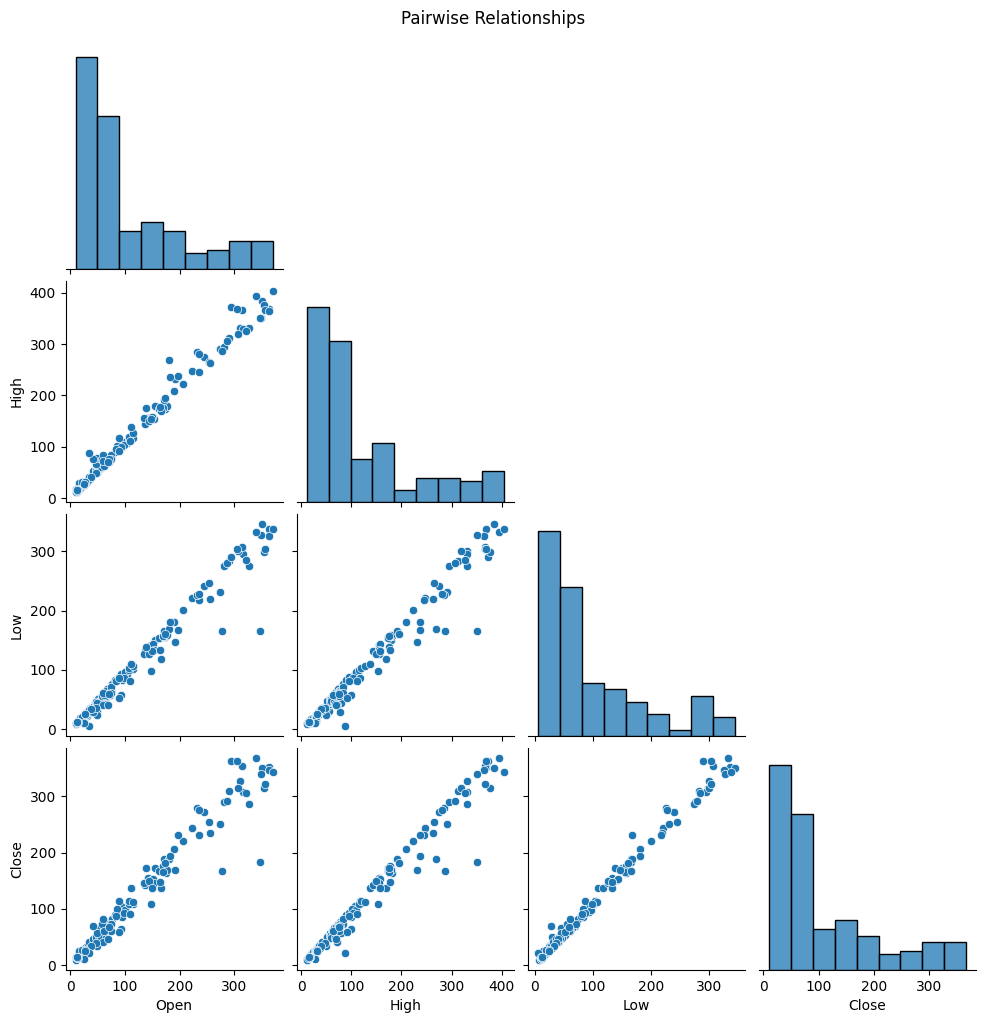

In [15]:
# DATA VISUALIZATION CHARTS

# Line Chart of Closing Price Over Time
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.title('Yes Bank Monthly Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.legend()
plt.grid(True)
plt.show()

# Histogram of Closing Prices (Univariate)
sns.histplot(df['Close'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Closing Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Boxplot of Open Prices (Outlier Detection)
sns.boxplot(x=df['Open'], color='lightgreen')
plt.title('Boxplot of Open Prices')
plt.grid(True)
plt.show()

# Scatter Plot: Open vs Close (Bivariate)
sns.scatterplot(x='Open', y='Close', data=df, color='coral')
plt.title('Scatterplot: Open vs Close')
plt.grid(True)
plt.show()

# Area Chart for Low Price Trend
plt.fill_between(df['Date'], df['Low'], color='lightblue', alpha=0.5)
plt.title('Low Price Over Time')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.grid(True)
plt.show()

# KDE Plot of High Prices (Density)
sns.kdeplot(df['High'], shade=True, color='orange')
plt.title('KDE Plot of High Prices')
plt.xlabel('High Price')
plt.grid(True)
plt.show()

# Correlation Heatmap (Multivariate)
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Monthly Average Close Bar Plot
df['Month'] = df['Date'].dt.month
monthly_avg = df.groupby('Month')['Close'].mean()
monthly_avg.plot(kind='bar', color='purple')
plt.title('Average Monthly Close Price')
plt.xlabel('Month')
plt.ylabel('Avg Close Price')
plt.grid(True)
plt.show()

# Joint Plot: High vs Close
sns.jointplot(x='High', y='Close', data=df, kind='scatter', color='teal')
plt.suptitle('High vs Close - Joint Distribution', y=1.02)
plt.show()

# Pair Plot (Full Variable Relationships)
sns.pairplot(df[['Open', 'High', 'Low', 'Close']], corner=True)
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

In [16]:
# FEATURE ENGINEERING

# Time-based split
train_size = int(len(df) * 0.8)
df_train = df.iloc[:train_size].copy()
df_test = df.iloc[train_size:].copy()

# Train Features
df_train['Prev_Close'] = df_train['Close'].shift(1)
df_train['3_MA_Close'] = df_train['Close'].rolling(window=3).mean()
df_train['Price_Change'] = df_train['Close'] - df_train['Open']
df_train = df_train.dropna().reset_index(drop=True)

# Test Features
last_train = df_train.tail(2).copy()
test_combined = pd.concat([last_train, df_test], ignore_index=True)
test_combined['Prev_Close'] = test_combined['Close'].shift(1)
test_combined['3_MA_Close'] = test_combined['Close'].rolling(window=3).mean()
test_combined['Price_Change'] = test_combined['Close'] - test_combined['Open']
df_test = test_combined.iloc[2:].reset_index(drop=True)
features = ['Open', 'High', 'Low', 'Prev_Close', '3_MA_Close', 'Price_Change']
target = 'Close'

X_train = df_train[features]
y_train = df_train[target]
X_test = df_test[features]
y_test = df_test[target]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# MODEL IMPLEMENTATION AND EVALUATING THE BEST MODEL

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# XGBoost Regressor
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

# Define Evaluation Function
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"🔍 {name}")
    print(f"MAE:  {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²:   {r2:.2f}")
    print("-" * 30)
    return rmse

# Evaluate All Models
rmse_gbr = evaluate_model("Gradient Boosting Regressor", y_test, gbr_pred)
rmse_rf = evaluate_model("Random Forest Regressor", y_test, rf_pred)
rmse_xgb = evaluate_model("XGBoost Regressor", y_test, xgb_pred)

# Determine Best Model
rmse_scores = {
    "Gradient Boosting Regressor": rmse_gbr,
    "Random Forest Regressor": rmse_rf,
    "XGBoost Regressor": rmse_xgb
}
best_model_name = min(rmse_scores, key=rmse_scores.get)
print(f"✅ Best Model: {best_model_name} with RMSE = {rmse_scores[best_model_name]:.2f}")

# Assign Best Model and Prediction
if best_model_name == "Gradient Boosting Regressor":
    best_model = gbr
    best_pred = gbr_pred
elif best_model_name == "Random Forest Regressor":
    best_model = rf
    best_pred = rf_pred
else:
    best_model = xgb
    best_pred = xgb_pred

🔍 Gradient Boosting Regressor
MAE:  11.18
RMSE: 18.28
R²:   0.98
------------------------------
🔍 Random Forest Regressor
MAE:  13.97
RMSE: 22.87
R²:   0.97
------------------------------
🔍 XGBoost Regressor
MAE:  12.61
RMSE: 24.99
R²:   0.96
------------------------------
✅ Best Model: Gradient Boosting Regressor with RMSE = 18.28


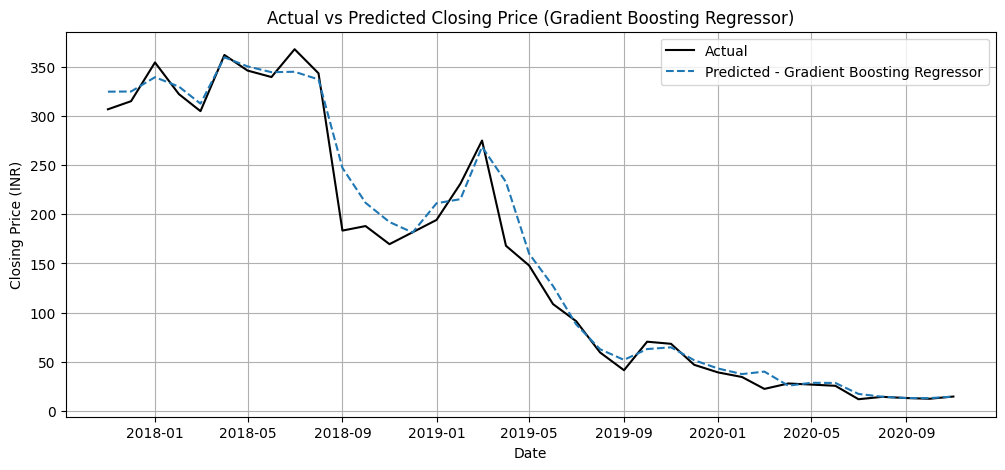

In [18]:
# PLOT ACTUAL VS PREDICTED

plt.figure(figsize=(12, 5))
plt.plot(df_test['Date'], y_test.values, label='Actual', color='black')
plt.plot(df_test['Date'], best_pred, label=f'Predicted - {best_model_name}', linestyle='--')
plt.title(f'Actual vs Predicted Closing Price ({best_model_name})')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# CONCLUSION - Among the three models tested, Gradient Boosting Regressor outperformed the others with the lowest RMSE of 18.28, along with a high R² score of 0.98, indicating excellent predictive accuracy. This makes it the best choice for forecasting Yes Bank’s monthly closing stock prices in this project.